# Acknowledgements

Turcan, E., & McKeown, K. (2019). Dreaddit: A Reddit dataset for stress analysis in social media. arXiv preprint arXiv:1911.00133.

# The relevant research paper link can be found here: -
https://aclanthology.org/D19-6213.pdf

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
!pip install numpy scipy scikit-learn
!pip install nltk
!pip install tensorflow
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
!pip install plotly
!pip install --upgrade numpy
!pip install --upgrade nbformat
!pip install spacy
!pip install WordCloud
!pip install gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from keras.models import Sequential
from keras import layers
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")


  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pre_processing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import nltk
nltk.download('stopwords')

train = pd.read_csv("/content/drive/MyDrive/A-Data/431/dreaddit-train.csv")
test = pd.read_csv("/content/drive/MyDrive/A-Data/431/dreaddit-test.csv")


df = [test,train]

df = pd.concat(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3553, 116)


In [ ]:
print("Duplicated rows before: ",df.duplicated().sum())
df.isnull().sum()

Duplicated rows before:  0


id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:
print("Duplicated rows before: ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicated rows after: ",df.duplicated().sum())

Duplicated rows before:  0
Duplicated rows after:  0


In [ ]:
import re
from bs4 import BeautifulSoup
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    sentence = BeautifulSoup(sentence, "html.parser").text

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[*%>]+>')

def remove_tags(text):
  return TAG_RE.sub('', text)


X=[]
sentences = list(df['text'])

for sen in sentences:
  X.append(preprocess_text(sen))

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.


In [ ]:
label_1_para = str.lower(''.join(df[df['label'] == 1]['text']))
label_1_para[:1000]

'we\'d be saving so much money with this new housr...its such an expensive city.... i did some googling in their language and found that it was illegal for them to do that. i was excited like oh ok if it happens ill call the police on them....  but now i did some further googling and turns out that if you sign the contract with that in it than everything is on their side... the contract is long term so we\'d have to give 6months notice before leaving even if we give it next week ill still have to live six months with this.... i wanna die i swear i havent been so helpless and scared in so long.... also two days ago my friend mentioned he ran into my ex who ruined my life and that he told him he wants to see mw and get closure.my ex used to shoot back with "do you want me to go with you?" all the time, no matter what it was. i almost wonder if i blocked out him asking me that about our own wedding. i unloaded a terrible memory of this on my current bf today and he took it like a champ, i

In [ ]:
label_0_para = str.lower(''.join(df[df['label'] == 0]['text']))
label_0_para[:1000]

'its like that, if you want or not.“ me: i have no problem, if it takes longer. but you asked my friend for help and let him wait for one hour and then you haven’t prepared anything. thats not what you asked for. instead of 3 hours, he helped you for 10 hours till 5am...i man the front desk and my title is hr customer service representative. about 50% of my job is spent onboarding new hires. maybe 10% is clerical/paperwork. the rest is dealing with people who walk in and need help with benefits, retirement, etc. although i am required to know the basics of our benefits plans and how the retirement and pension benefits work, many employees have questions beyond my knowledge base.i haven’t said anything to him yet because i’m not sure how someone would take hearing that their partner has such fluctuations of feelings towards them (especially since he told me he loves me and is somewhat clingy). nonetheless, i know a conversation will need to be had but i want to get my feelings in order 

<Axes: xlabel='label', ylabel='count'>

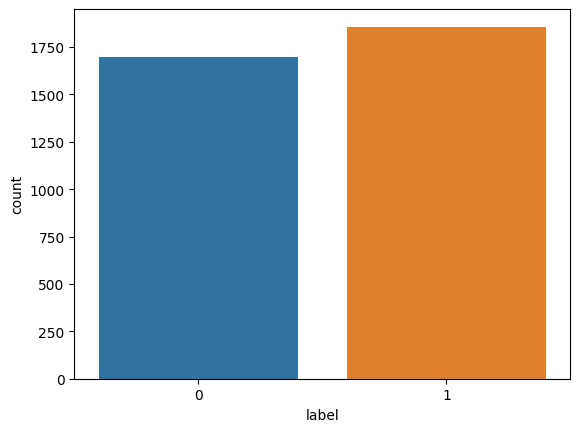

In [ ]:
import seaborn as sns
sns.countplot(x=df.label)

In [ ]:
X=df.text
y=df.label
acc=[]
f1=[]
from sklearn.model_selection import train_test_split

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### **CountVectorizer**

Machine Learning Models

Accuracy: 0.6962025316455697
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63       343
           1       0.66      0.85      0.74       368

    accuracy                           0.70       711
   macro avg       0.71      0.69      0.69       711
weighted avg       0.71      0.70      0.69       711



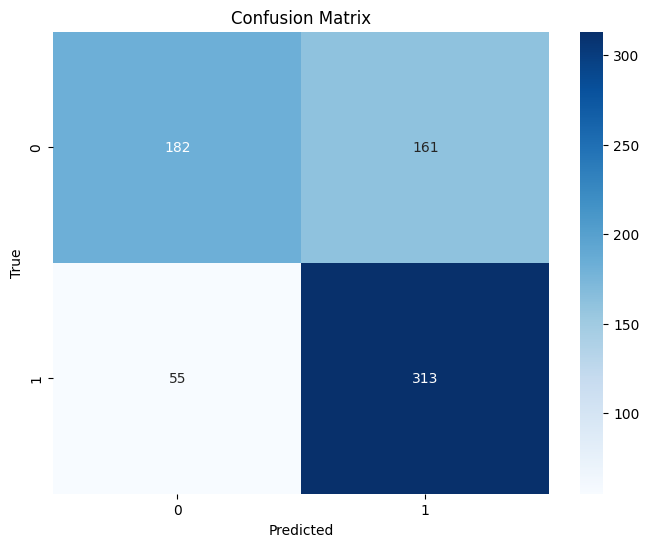

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

mb=MultinomialNB()
tahmin=mb.fit(x_train,y_train).predict(x_test)
accuracy_score(tahmin,y_test)

acc.append(accuracy_score(tahmin,y_test))
f1.append(f1_score(y_test, tahmin, average=None))

accuracy_score(tahmin,y_test)

print("Accuracy:", accuracy_score(tahmin,y_test))
print("Classification Report:\n", classification_report(y_test, tahmin))

cm = confusion_matrix(y_test, tahmin)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.6779184247538678
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       343
           1       0.68      0.71      0.70       368

    accuracy                           0.68       711
   macro avg       0.68      0.68      0.68       711
weighted avg       0.68      0.68      0.68       711



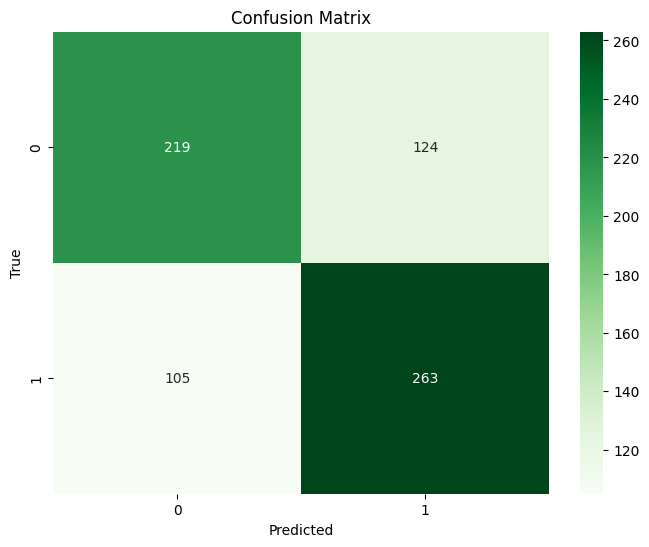

In [ ]:
# Initialize and train an SVM classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.5907172995780591
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.61       343
           1       0.63      0.52      0.57       368

    accuracy                           0.59       711
   macro avg       0.59      0.59      0.59       711
weighted avg       0.60      0.59      0.59       711



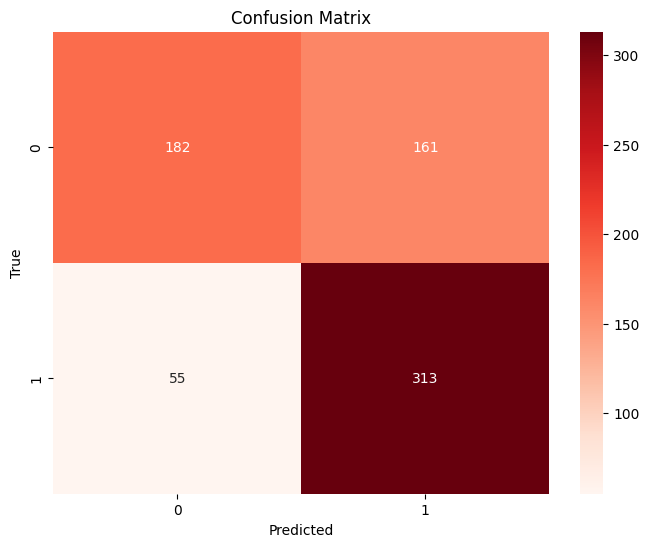

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, tahmin)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6680731364275668
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.61       343
           1       0.65      0.78      0.71       368

    accuracy                           0.67       711
   macro avg       0.67      0.66      0.66       711
weighted avg       0.67      0.67      0.66       711



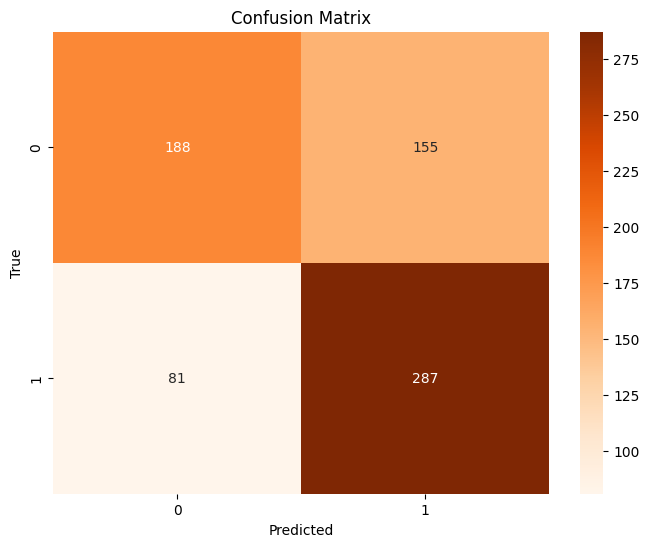

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(x_train, y_train)

y_pred = random_forest_classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6132208157524613
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59       343
           1       0.62      0.64      0.63       368

    accuracy                           0.61       711
   macro avg       0.61      0.61      0.61       711
weighted avg       0.61      0.61      0.61       711



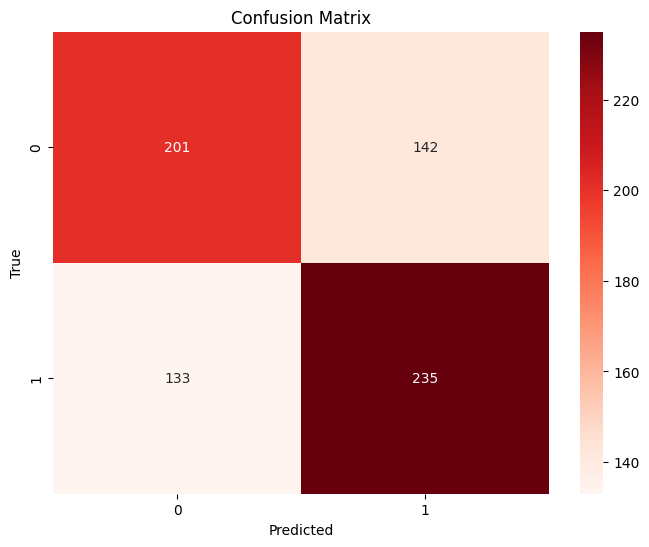

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(x_train, y_train)

y_pred = decision_tree_classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.69901547116737
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67       343
           1       0.69      0.77      0.72       368

    accuracy                           0.70       711
   macro avg       0.70      0.70      0.70       711
weighted avg       0.70      0.70      0.70       711



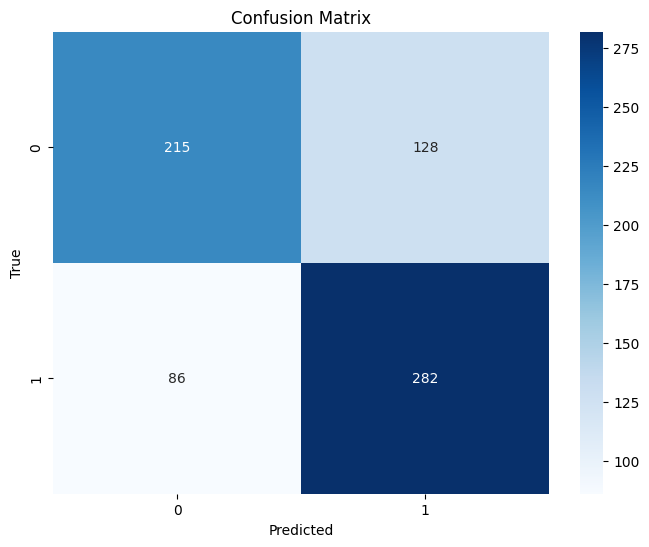

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1000,500), random_state=42)
mlp_classifier.fit(x_train, y_train)

y_pred = mlp_classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6976090014064698
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       343
           1       0.70      0.73      0.71       368

    accuracy                           0.70       711
   macro avg       0.70      0.70      0.70       711
weighted avg       0.70      0.70      0.70       711



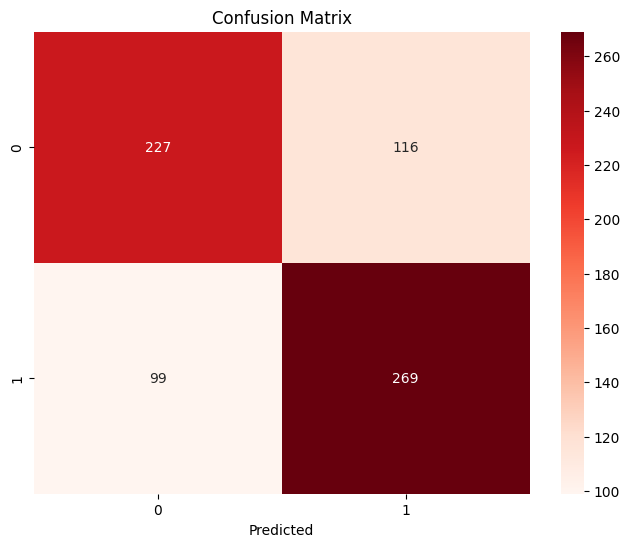

In [ ]:
from sklearn.linear_model import LogisticRegression
vect = CountVectorizer(stop_words='english', max_features=50000)
X_train_c = vect.fit_transform(X_train)
X_test_c = vect.transform(X_test)
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the Logistic Regression model
logreg_model.fit(X_train_c, y_train)

# Predict using the trained model
y_pred = logreg_model.predict(X_test_c)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install lime


In [ ]:
from lime.lime_text import LimeTextExplainer
from lime.lime_tabular import LimeTabularExplainer
from sklearn.pipeline import make_pipeline


c = make_pipeline(vect, logreg_model)
class_names = ['Not Stress', 'Stress']
explainer = LimeTextExplainer(class_names=class_names)


# Predict and explain given instance
index = 279
exp = explainer.explain_instance(list(X_test)[index],
                                 classifier_fn=c.predict_proba,
                                 num_features=10)

In [ ]:
exp.show_in_notebook(text=True)
print ('Explanation for class %s' % class_names [1])
print ('\n'.join(map(str, exp.as_list())))


Explanation for class Stress
('scared', 0.20849347735452303)
('abusive', 0.08100839091976726)
('raised', -0.04882222394312952)
('days', 0.04843395689950211)
('kill', 0.04280442987431475)
('mother', 0.03900410839413883)
('fat', 0.037779411697623215)
('voice', 0.03552830722037882)
('telling', 0.03500198503675893)
('severely', 0.023246872916483877)


In [ ]:
!pip install shap

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


Summary: - Have been working at a factory job for 1 month, hoping it would be a career change. Pretty physical job, push/pulling things that are up to 150lb quite often during my day. - Came into this job while recovering from a bulging disc in my lower back (L5/S1) - A medical certificate was provided to my employer advising that I have a back injury going into this job.


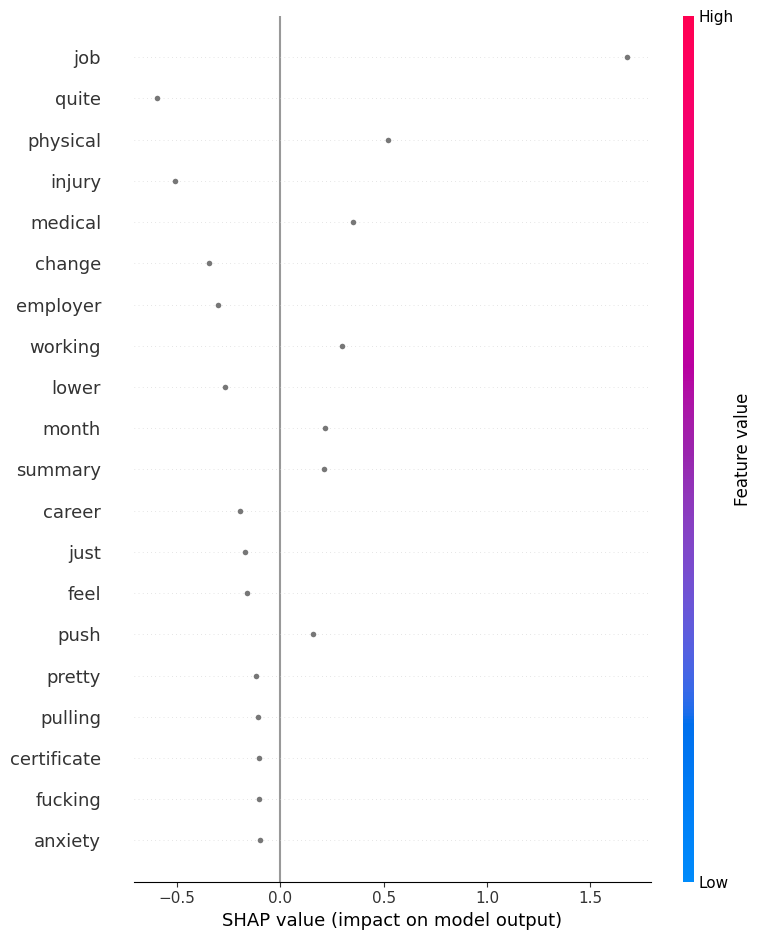

In [ ]:
import shap
# Initialize the SHAP explainer for your model
explainer = shap.Explainer(logreg_model, X_train_c)

# Calculate SHAP values for a sample of your test data
sample_idx = 313
shap_values = explainer.shap_values(X_test_c[sample_idx])
print(list(X_test)[sample_idx])
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_c[sample_idx], feature_names=vect.get_feature_names_out())

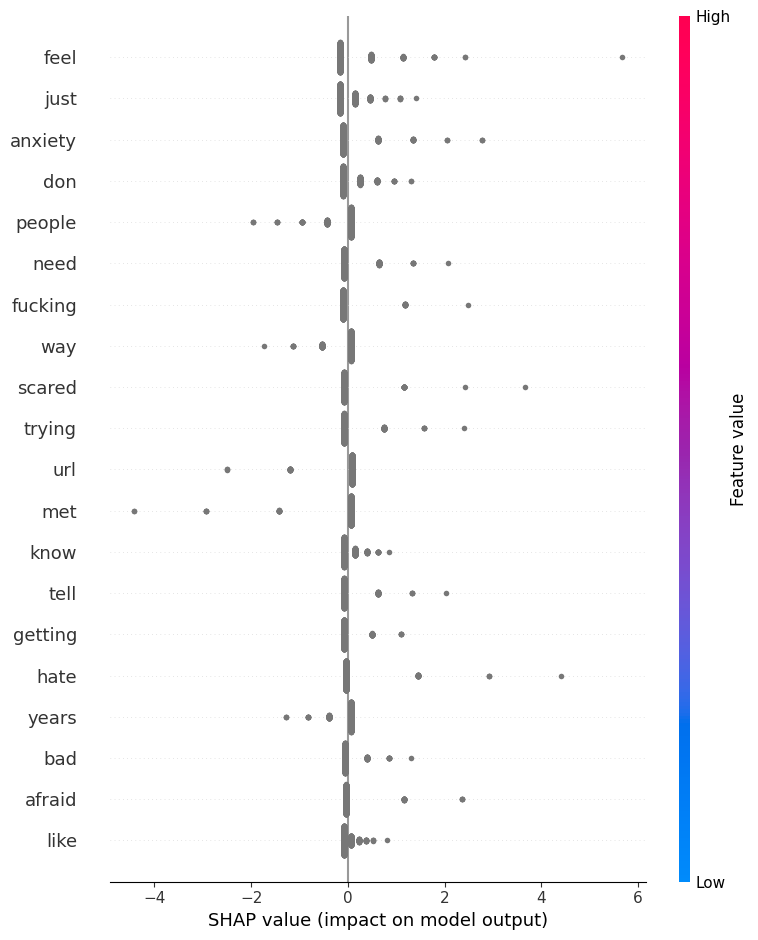

In [ ]:
# Calculate SHAP values for all test data
shap_values = explainer.shap_values(X_test_c)

# Plot the SHAP summary plot for the entire test set
shap.summary_plot(shap_values, X_test_c, feature_names=vect.get_feature_names_out())

# Create individual SHAP force plot for a specific instance (sample_idx)
shap.initjs()

Accuracy: 0.6610407876230661
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       343
           1       0.67      0.67      0.67       368

    accuracy                           0.66       711
   macro avg       0.66      0.66      0.66       711
weighted avg       0.66      0.66      0.66       711



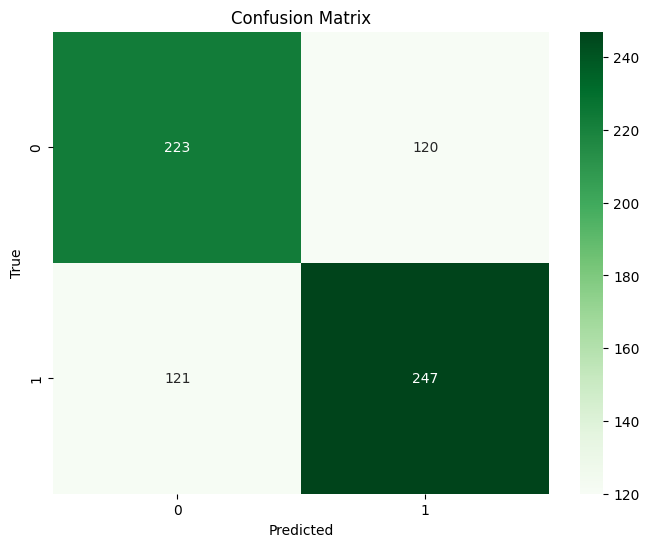

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(x_train, y_train)

y_pred = adaboost_classifier.predict(x_test)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6849507735583685
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67       343
           1       0.69      0.71      0.70       368

    accuracy                           0.68       711
   macro avg       0.68      0.68      0.68       711
weighted avg       0.68      0.68      0.68       711



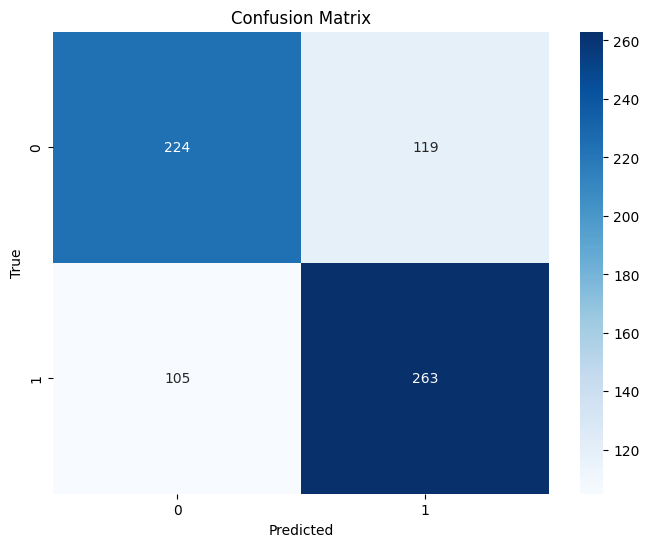

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost classifier
xgb_model.fit(X_train_c, y_train)

# Predict using the trained model
y_pred = xgb_model.predict(X_test_c)
acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Deep Learning**

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize


tokenizer = Tokenizer (num_words=5000)
tokenizer. fit_on_texts(X_train)

X_train_ = tokenizer.texts_to_sequences(X_train)
X_test_ = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved @ index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train_pad = pad_sequences(X_train_, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_, padding='post', maxlen=maxlen)

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

tokenizer = Tokenizer (num_words=5000)
tokenizer. fit_on_texts(X_train)

X_train_ = tokenizer.texts_to_sequences(X_train)
X_test_ = tokenizer.texts_to_sequences(X_test)

# Adding 1 because of reserved @ index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train_pad = pad_sequences(X_train_, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_, padding='post', maxlen=maxlen)

In [ ]:

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/A-Data/glove.6B/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()



In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector


glove_embeddings=embedding_matrix

### ATTENTION BASED LSTM

In [ ]:
# Create the RNN model
embedding_dim = 100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[glove_embeddings], input_length=maxlen, trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1209700   
                                                                 
 lstm_9 (LSTM)               (None, 64)                42240     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,252,005
Trainable params: 42,305
Non-trainable params: 1,209,700
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train_pad,
                    y_train,
                    epochs=45,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[checkpoint])

# Load the best model
model.load_weights("best_model.hdf5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test))

print(f'Test loss: {test_loss}, \nTest accuracy: {test_accuracy*100}')


Epoch 1/45
74/80 [==========================>...] - ETA: 0s - loss: 0.6865 - accuracy: 0.5186
Epoch 1: val_accuracy improved from -inf to 0.45614, saving model to best_model.hdf5
80/80 [==============================] - 4s 14ms/step - loss: 0.6862 - accuracy: 0.5276 - val_loss: 0.7180 - val_accuracy: 0.4561
Epoch 2/45
73/80 [==========================>...] - ETA: 0s - loss: 0.6737 - accuracy: 0.5758
Epoch 2: val_accuracy improved from 0.45614 to 0.68772, saving model to best_model.hdf5
80/80 [==============================] - 1s 8ms/step - loss: 0.6735 - accuracy: 0.5784 - val_loss: 0.6257 - val_accuracy: 0.6877
Epoch 3/45
77/80 [===========================>..] - ETA: 0s - loss: 0.6579 - accuracy: 0.6124
Epoch 3: val_accuracy did not improve from 0.68772
80/80 [==============================] - 1s 7ms/step - loss: 0.6577 - accuracy: 0.6136 - val_loss: 0.6549 - val_accuracy: 0.5965
Epoch 4/45
76/80 [===========================>..] - ETA: 0s - loss: 0.6465 - accuracy: 0.6406
Epoch 4: val

23/23 [==============================] - 0s 4ms/step
Accuracy: 0.6905766526019691
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       343
           1       0.71      0.67      0.69       368

    accuracy                           0.69       711
   macro avg       0.69      0.69      0.69       711
weighted avg       0.69      0.69      0.69       711



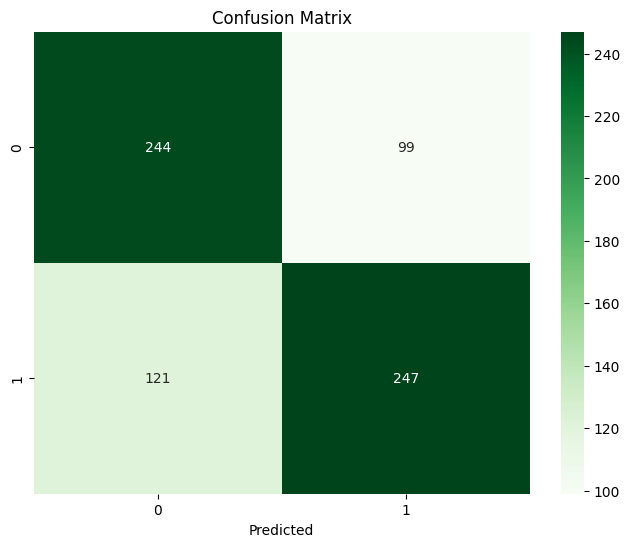

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### rnn

In [ ]:
# Create the RNN model
embedding_dim = 100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[glove_embeddings], input_length=maxlen, trainable=False),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1209700   
                                                                 
 lstm_10 (LSTM)              (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,252,005
Trainable params: 42,305
Non-trainable params: 1,209,700
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train_pad,
                    y_train,
                    epochs=35,
                    batch_size=42,
                    validation_split=0.1,
                    callbacks=[checkpoint])

# Load the best model
model.load_weights("best_model.hdf5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test))

print(f'Test loss: {test_loss}, \nTest accuracy: {test_accuracy*100}')


Epoch 1/35
59/61 [============================>.] - ETA: 0s - loss: 0.6893 - accuracy: 0.5238
Epoch 1: val_accuracy improved from -inf to 0.45614, saving model to best_model.hdf5
61/61 [==============================] - 3s 17ms/step - loss: 0.6896 - accuracy: 0.5229 - val_loss: 0.6932 - val_accuracy: 0.4561
Epoch 2/35
60/61 [============================>.] - ETA: 0s - loss: 0.6767 - accuracy: 0.5377
Epoch 2: val_accuracy improved from 0.45614 to 0.69825, saving model to best_model.hdf5
61/61 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.5397 - val_loss: 0.6371 - val_accuracy: 0.6982
Epoch 3/35
57/61 [===========================>..] - ETA: 0s - loss: 0.6835 - accuracy: 0.5514
Epoch 3: val_accuracy did not improve from 0.69825
61/61 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.5514 - val_loss: 0.6870 - val_accuracy: 0.5474
Epoch 4/35
55/61 [==========================>...] - ETA: 0s - loss: 0.6637 - accuracy: 0.5861
Epoch 4: val

23/23 [==============================] - 0s 3ms/step
Accuracy: 0.7060478199718706
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70       343
           1       0.72      0.71      0.71       368

    accuracy                           0.71       711
   macro avg       0.71      0.71      0.71       711
weighted avg       0.71      0.71      0.71       711



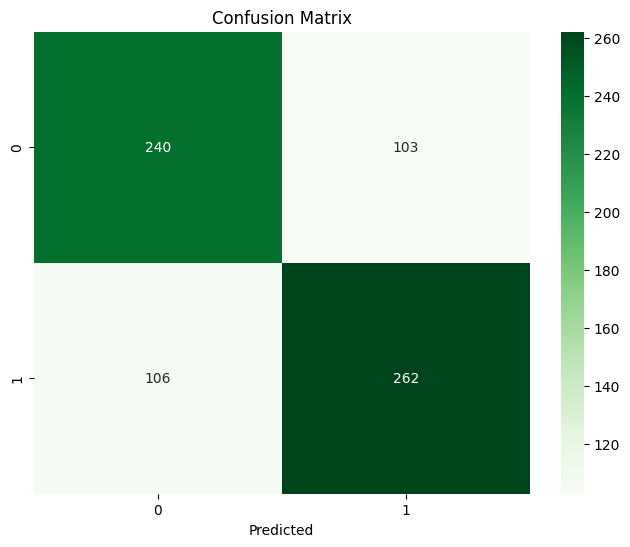

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### cnn

In [ ]:
# Create the CNN model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.callbacks import ModelCheckpoint
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

embedding_dim = 100

# Create the CNN-LSTM model
embedding_dim = 100
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, embedding_dim, weights=[glove_embeddings], input_length=maxlen, trainable=False),
    Conv1D(128, 5, activation='relu'),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint("best_model_cnn.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train_pad,
                    y_train,
                    epochs=35,
                    batch_size=42,
                    validation_split=0.1,
                    callbacks=[checkpoint])

# Load the best model
model.load_weights("best_model_cnn.hdf5")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, np.array(y_test))
print(f'Test loss: {test_loss}, \nTest accuracy: {test_accuracy*100}')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          1209700   
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,323,301
Trainable params: 113,601
Non-trainable params: 1,209,700
_________________________________________________________________
Epoch 1/35
55/61 [==========================>...] - ETA: 0s - loss: 0.6860 - accuracy: 0.5229
Epoch 1: val_accuracy improved from -inf to 0.59298, saving model to best_m

23/23 [==============================] - 0s 3ms/step
Accuracy: 0.7215189873417721
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       343
           1       0.72      0.76      0.74       368

    accuracy                           0.72       711
   macro avg       0.72      0.72      0.72       711
weighted avg       0.72      0.72      0.72       711



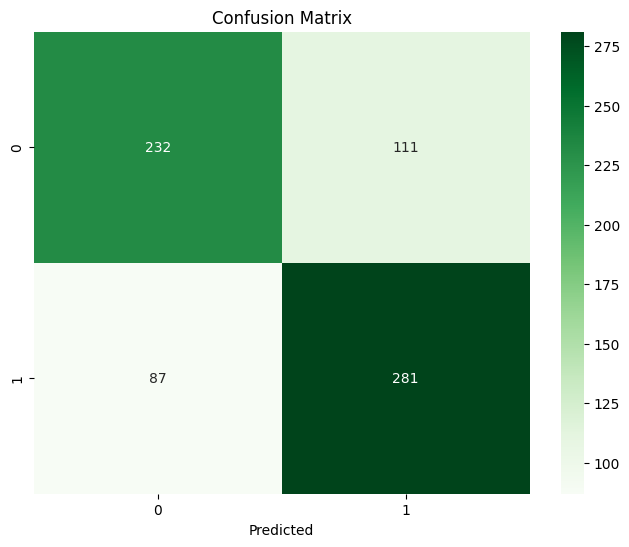

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the test set labels
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)

acc.append(accuracy_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_labels = sorted(set(y_test))  # Get unique class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### **Reports**

In [ ]:


# Sample data (replace these with your actual data)
models = ['MNB',  'SVC', 'KNN', 'Random Forest', 'Decision Tree', 'MLP', 'Log.Regression','AdaBoost',
          'XGBoost', 'ATTENTION-LSTM', 'RNN-LSTM', 'CNN-LSTM']

f1_stress = []
f1_nostress = []

for i in f1:
  f1_nostress.append(i[0])
  f1_stress.append(i[1])


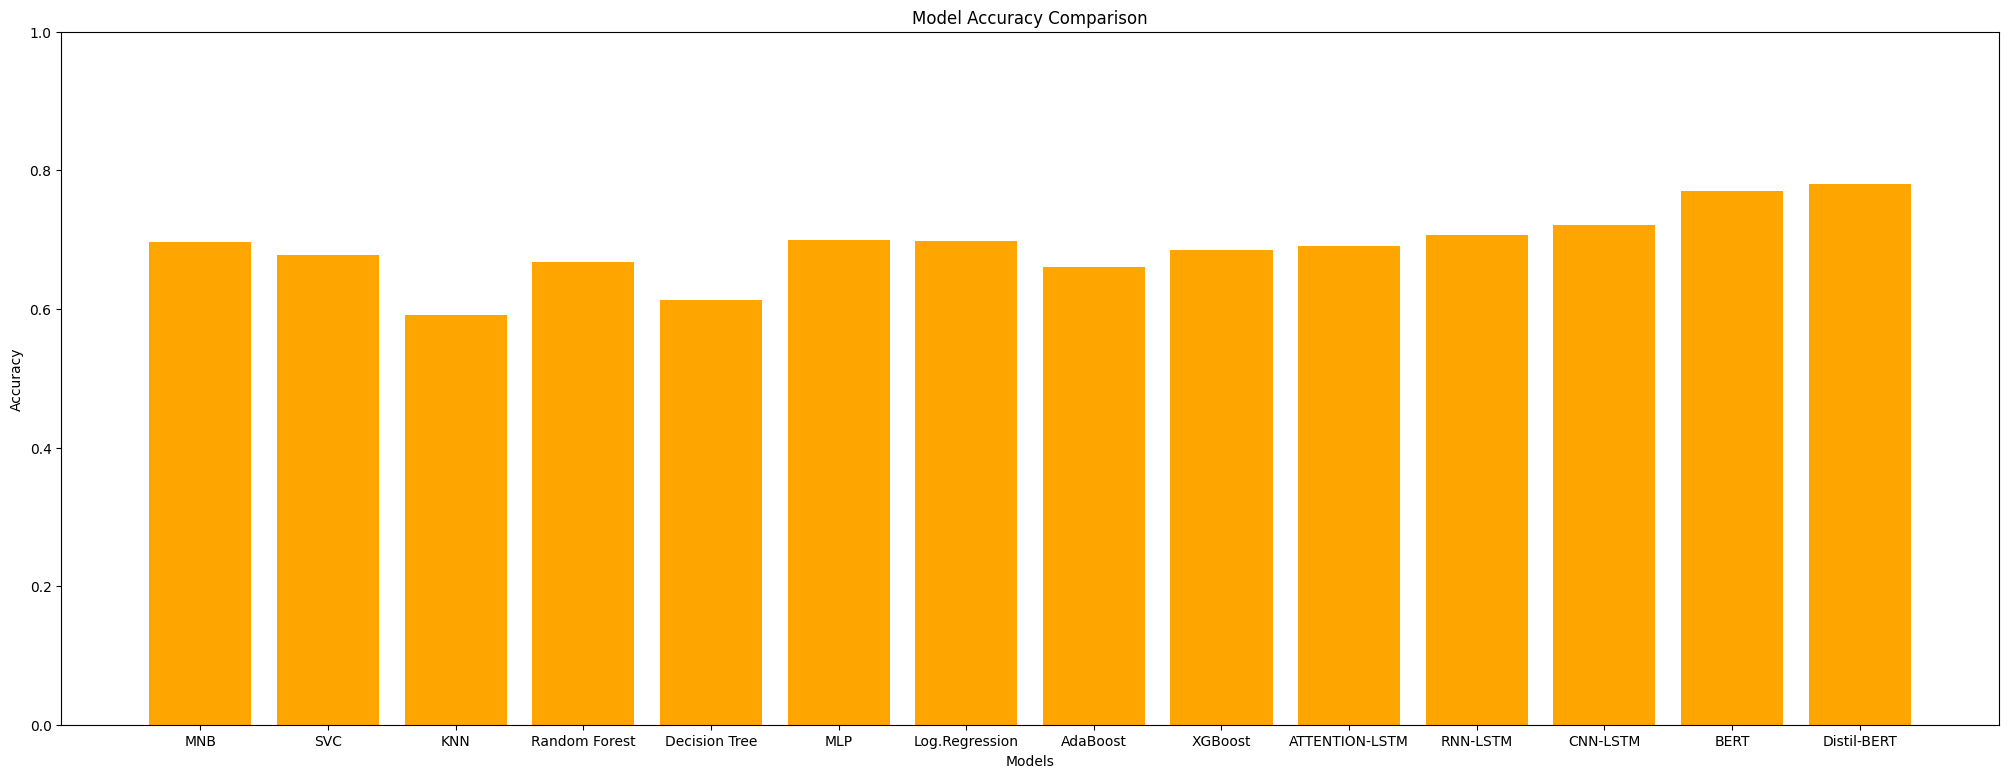

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 9))
plt.bar(models, acc, color='orange')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.show()


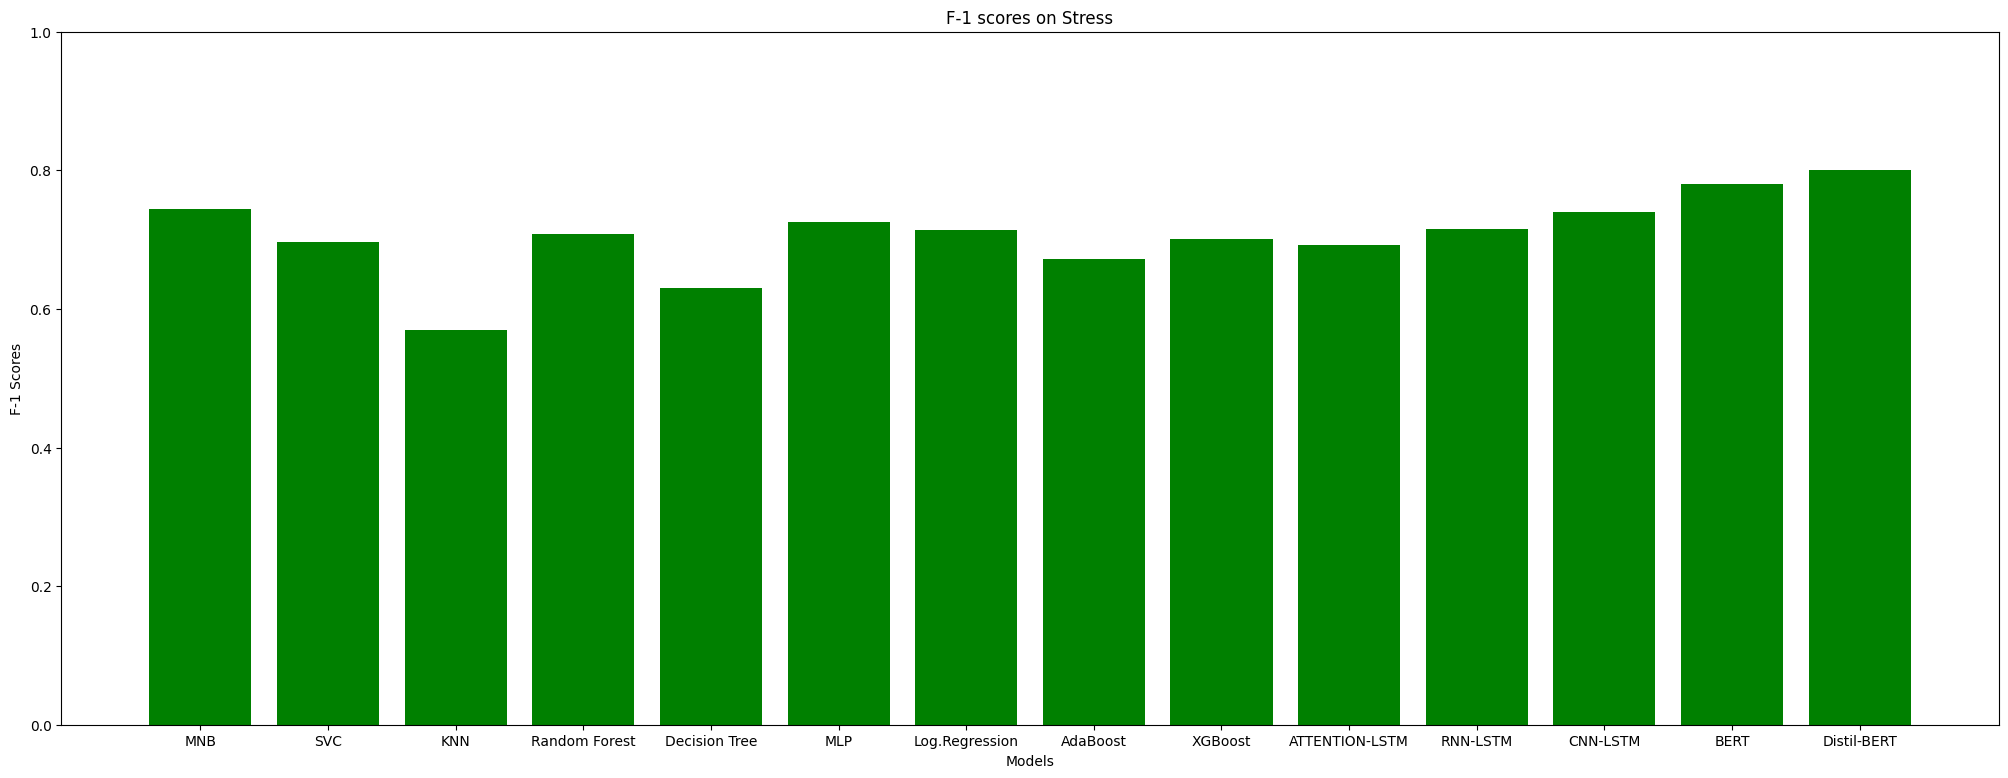

In [ ]:

plt.figure(figsize=(25,9))
plt.bar(models, f1_stress, color='green')
plt.xlabel('Models')
plt.ylabel('F-1 Scores')
plt.title('F-1 scores on Stress')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1
plt.show()

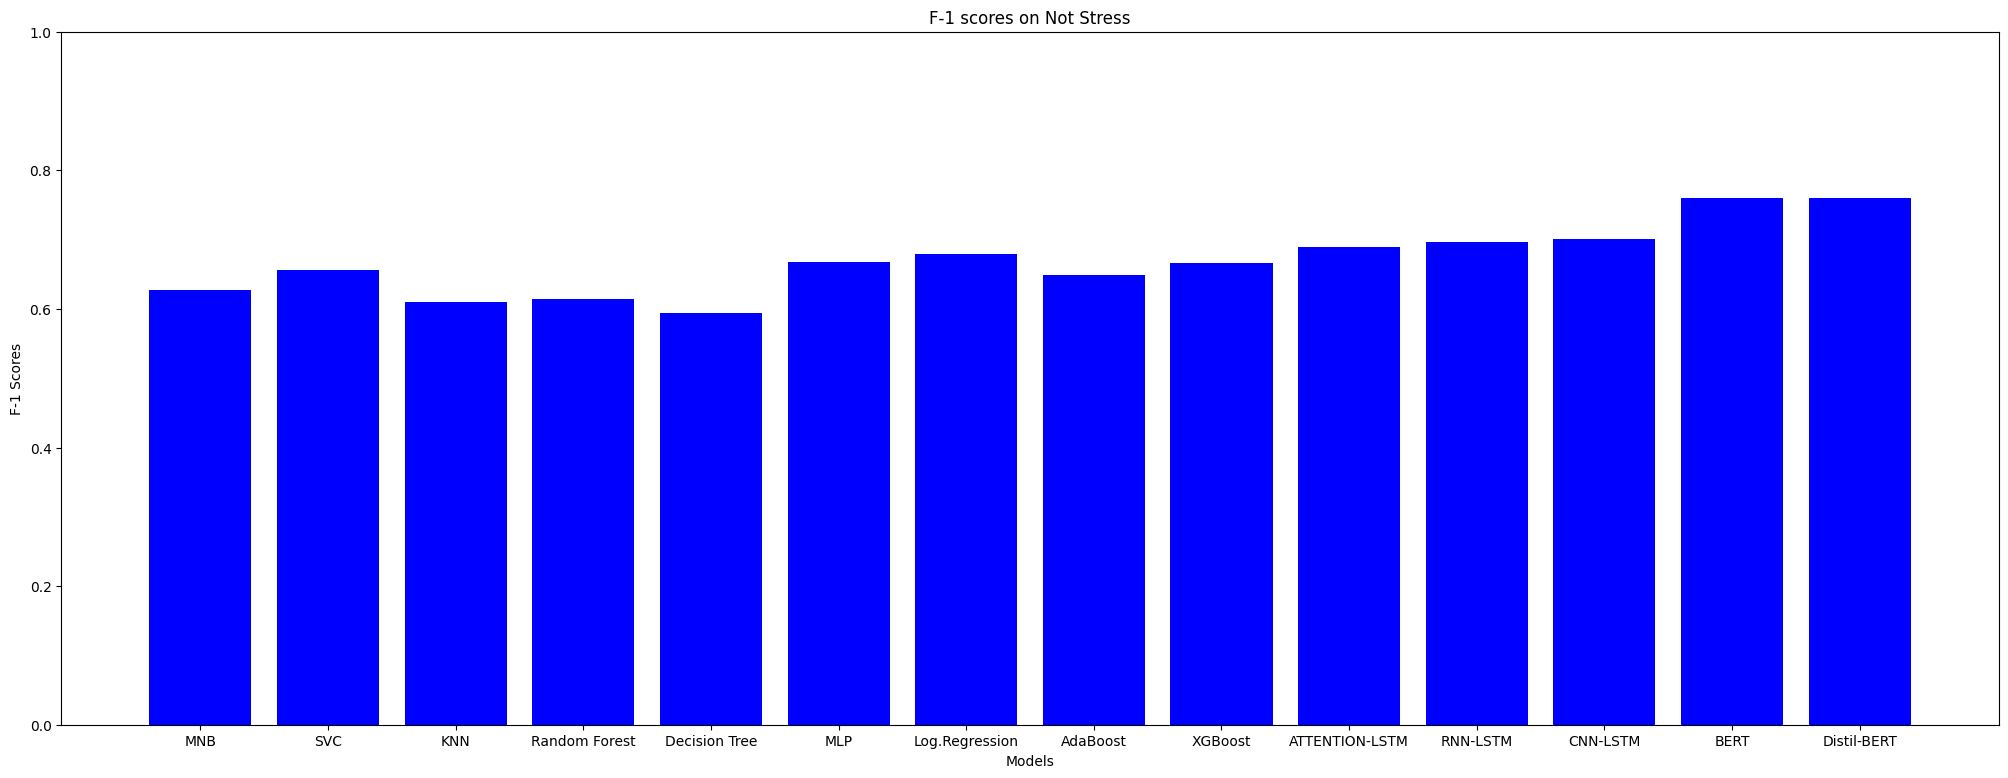

In [ ]:
plt.figure(figsize=(25,9))
plt.bar(models, f1_nostress, color='Blue')
plt.xlabel('Models')
plt.ylabel('F-1 Scores')
plt.title('F-1 scores on Not Stress')
plt.ylim(0, 1)
plt.show()

In [ ]:
print('Models:',models)
print('Accuracy:',acc)
print('stress:',f1_stress)
print('Not stress:',f1_nostress)